# Define Paths

In [4]:
pathTo95TVA2DVASample = "localData/95TVA2DVASample/"
gold_standard_path = "localData/gold_standards/"
#ALL Pair sample can be found in TODO: insert link!
allPairsSamplePath = "<REPLACE THIS>"

# Print Recall Table of RSG or DGS (Table 3):

In [3]:
import role_matching.EvaluationHelperMethods as rm
import role_matching.MetricHelperMethods as mhm
import pandas as pd
from plotnine import *
from plotnine.data import *
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

bucketAndDatasetToWeight, _ = rm.getBucketAndDatasetToWeight(pathTo95TVA2DVASample)

loadDiverseGoldStandard = False
if(loadDiverseGoldStandard):
    weighted = False
else:
    weighted = True
df = rm.readGoldStandardEvaluation(gold_standard_path,loadDiverseGoldStandard,pathTo95TVA2DVASample)
methodNames = ['isInExactMatchBlockingWithFilter','isInStrictBlockingNoDecayWithFilter','isInSequenceBlockingWithFilter','isInTSMBlockingWithFilter','isInValueSetBlockingWithFilter']

print("dataset","#TP","EM","CBRB","QSM","TSM","VSM",sep=",")
print("," + (",R"* (len(methodNames))))
dsNameList = []
for dsName in df['dataset'].unique():
    dsNameList.append(dsName)
dsNameList.sort()
for dsName in dsNameList:
    shortName = rm.datasetToAbbreviation[dsName]
    mhm.printRecallForNonparametrizedMethodsDF(shortName,df[df['dataset']==dsName],methodNames,weighted,bucketAndDatasetToWeight)
mhm.printRecallForNonparametrizedMethodsDF("Micro-AVG",df,methodNames,weighted,bucketAndDatasetToWeight)
mhm.printMacroAveragesRecall("Macro-AVG",df,methodNames,weighted,bucketAndDatasetToWeight)

dataset,#TP,EM,CBRB,QSM,TSM,VSM
,,R,R,R,R,R
ED,20,41,47,67,67,67
FO,7,100,100,100,100,100
MI,21,18,85,44,69,69
PO,33,37,62,66,76,78
TV,58,7,50,78,99,99
Micro-AVG,139,27,59,68,80,81
Macro-AVG,,41,69,71,82,82,

In [11]:
print(df[(df['isSemanticRoleMatch']) & (df['isInStrictBlockingNoDecay']) & (~df['isInStrictBlockingNoDecayWithFilter'])][['id1','id2']])
df[(df['isSemanticRoleMatch']) & (df['isInStrictBlockingNoDecay']) & (~df['isInStrictBlockingNoDecayWithFilter'])][['dataset','id1','id2']].to_csv("gs1errors.csv")
#df["newLabel"] = (df['isSemanticRoleMatch']) | ((df['isSemanticRoleMatch']) & (df['isInStrictBlockingNoDecay']) & (~df['isInStrictBlockingNoDecayWithFilter']))
#print(sum(df["newLabel"]))
#print(sum(df["isSemanticRoleMatch"]))

Empty DataFrame
Columns: [id1, id2]
Index: []


# Print How Many True Positives could correct Data quality errors (Introduction):

In [12]:
df1 = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
df2 = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
dfAll = df1.append(df2)
dfAllTP = dfAll[dfAll['isSemanticRoleMatch']]
print(sum(dfAllTP["hasNonOverlap"]) / len(dfAllTP.index))
print(sum(~ dfAllTP["isInStrictBlockingNoDecay"]) / len(dfAllTP.index))
print(sum( dfAllTP["compatibilityPercentageNoDecay"] != 1.0) / len(dfAllTP.index))

0.32679738562091504
0.24183006535947713
0.24183006535947713


/tmp/ipykernel_81200/3615401763.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Gold Standard Overview (Figure 6)

In [13]:
# true positives:
dfTruePositivesOnly = df[df['isSemanticRoleMatch']]
tab = dfTruePositivesOnly.groupby(['dataset','bucket']).size()
print(tab)

dataset      bucket          
education    [0.0,0.7) (<70%)     2
             [0.7,1.0) (70%)      2
             [1.0,1.0] (full)    15
football     [0.7,1.0) (70%)      3
             [1.0,1.0] (full)    41
military     [0.0,0.7) (<70%)     5
             [0.7,1.0) (70%)      4
             [1.0,1.0] (full)    12
politics     [0.0,0.7) (<70%)     6
             [0.7,1.0) (70%)      7
             [1.0,1.0] (full)    20
tv_and_film  [0.0,0.7) (<70%)     3
             [0.7,1.0) (70%)      5
             [1.0,1.0] (full)    28
dtype: int64


/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


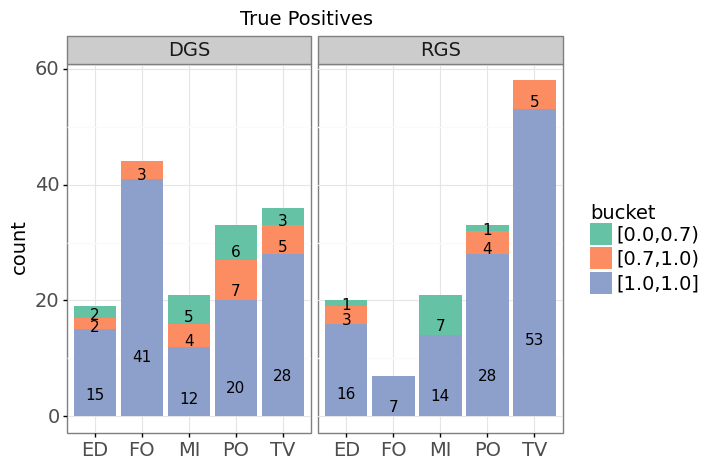

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: exportedPlots/truePositivesBoth.png
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [14]:
import role_matching.EvaluationHelperMethods as rm
loadDiverseGoldStandard=True # old or new gold standard

df1 = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
df1["GS"] = "DGS"
df2 = rm.readGoldStandardEvaluation(gold_standard_path,False,pathTo95TVA2DVASample)
df2["GS"] = "RGS"

rm.addShortDataset(df1)
rm.addShortDataset(df2)
df1['bucket'] = df1['compatibilityPercentageNoDecay'].map(lambda x: rm.getShortGroup(x))
df2['bucket'] = df2['compatibilityPercentageNoDecay'].map(lambda x: rm.getShortGroup(x))

dfTruePositivesOnlyDF1 = df1[df1['isSemanticRoleMatch']]
dfTruePositivesOnlyDF2 = df2[df2['isSemanticRoleMatch']]
dfAllPositives = pd.concat([dfTruePositivesOnlyDF1,dfTruePositivesOnlyDF2])

cbPalette = ["#1b9e77", "#d95f02", "#7570b3", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

plot = ggplot(dfAllPositives,aes(x = 'datasetShort',fill="bucket")) +xlab("") + geom_bar(stat = "count") + facet_wrap("GS") + theme_bw() + ggtitle("True Positives") + theme(text=element_text(size=14)) +  geom_text(aes(label = "..count.."),position = position_stack(vjust = 0.25), stat = "count")+ scale_fill_brewer(type="qual",palette="Set2")
print(plot)
plot.save("exportedPlots/truePositivesBoth.png")


# Reduction Ratios of Non-Parametrized Methods (Table 4 and Figure 7)

In [16]:
import glob
import os
import pandas as pd
import role_matching.EvaluationHelperMethods as rm

#Statistics extracted from the sample drawing:
#We drew a sample from the set of all pairs until we had 1 million candidate pairs that had at least one timestamp-value agreement (1TVA)
#Having 1TVA is a prerequisite for a candidate pair in order to be considered
#We tracked how many candidate pairs did not have 1TVA per dataset in order to be able to compute the correct (estimated) reduction ratio
#allPairs denotes the number of all pairs per dataset
dsToBaseSampleStatistics = {
    "military": {"allPairs":4263199291,"nMisses1TVA":88280922,"nHits1TVA":1000000},
    "tv_and_film": {"allPairs":23657801481,"nMisses1TVA":50646743,"nHits1TVA":1000000},
    "politics": {"allPairs":2223411270,"nMisses1TVA":41041877,"nHits1TVA":1000000},
    "education": {"allPairs":2737889001,"nMisses1TVA":28997770,"nHits1TVA":1000000},
    "football": {"allPairs":53116323211,"nMisses1TVA":38466606,"nHits1TVA":1000000},
}

#these are the files that contain the statistics about the 1 million candidates in TVA (per dataset):
dfAllPairsSample = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', allPairsSamplePath + "/*.csv"))))

methodNames = ['isInValueSetBlockingWithFilter','isInStrictBlockingNoDecayWithFilter',"isInTSMBlockingNoWildcard","isInTSMBlockingWithFilter"]

rm.addFilteredBlockingMethods(dfAllPairsSample)
rm.addDVA2VA95Blocking(dfAllPairsSample)
#rm.addParametrizedScoresAsBooleanScores(dfAllPairsSample)
#print(dfAllPairsSample.columns)
groupedByDS = dfAllPairsSample.groupby("dataset")


dataset,#Total Pairs,EM,CBRB,QSM,TSM,VSM
education,2737889001,0.9999997666493209,0.9999987665749821,0.9999974331425303,0.9999956996803429,0.9999935328526087,
football,53116323211,0.9999997212833553,0.9999979476319804,0.9999633614301671,0.9999550252687044,0.999934197533986,
military,4263199291,0.9999994847723459,0.9999925403996164,0.9999904794889999,0.9999828070771939,0.9999821238405222,
politics,2223411270,0.9999991674967319,0.9999982636360408,0.9999964559146586,0.9999953141958909,0.9999948622655453,
tv_and_film,23657801481,0.9999999612753896,0.9999998063769481,0.9999990706093509,0.9999980250448707,0.9999968052196437,


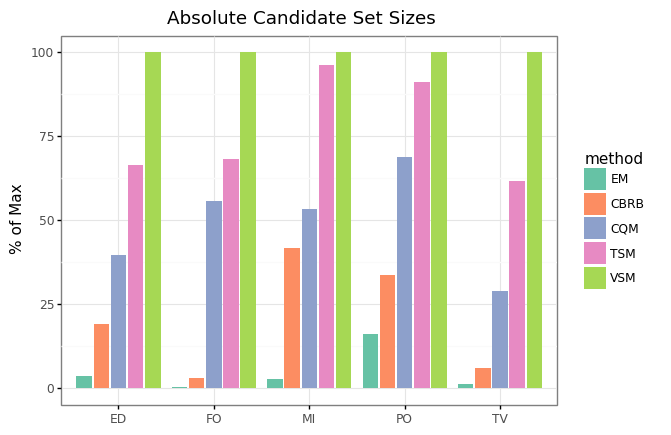

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: exportedPlots/absoluteSetSizes.png


In [17]:
import role_matching.MetricHelperMethods as mhm

methodNames = ['isInExactMatchBlockingWithFilter','isInStrictBlockingNoDecayWithFilter','isInSequenceBlockingWithFilter','isInTSMBlockingWithFilter','isInValueSetBlockingWithFilter']

methodNamesToShortMethodName = {
    'isInExactMatchBlockingWithFilter':"EM",
    'isInStrictBlockingNoDecayWithFilter':"CBRB",
    'isInSequenceBlockingWithFilter':"CQM",
    'isInTSMBlockingWithFilter':"TSM",
    'isInValueSetBlockingWithFilter':"VSM"
}
print("dataset","#Total Pairs","EM","CBRB","QSM","TSM","VSM",sep=",")
finalDSRows = []
for (ds,thisDsAllPairsSample) in groupedByDS:
    nAllPairs = dsToBaseSampleStatistics[ds]["allPairs"]
    nHits1TVA = dsToBaseSampleStatistics[ds]["nHits1TVA"]
    nMisses1TVA = dsToBaseSampleStatistics[ds]["nMisses1TVA"]
    estimatedCountSVAPairs = round((nHits1TVA / (nHits1TVA+nMisses1TVA)) * nAllPairs)
    nHits90VA2DA = len(thisDsAllPairsSample[thisDsAllPairsSample['isInDVA2VA95Blocking']].index)
    nMisses90VA2DA = len(thisDsAllPairsSample[thisDsAllPairsSample['isInDVA2VA95Blocking']].index)
    print(ds,nAllPairs,sep=",",end=",")
    for method in methodNames:
        thisDF = thisDsAllPairsSample[thisDsAllPairsSample[method]]
        nHitsThisMethod = len(thisDF.index)
        nMissesThisMethod = nMisses1TVA + len(thisDsAllPairsSample.index) - nHitsThisMethod
        n,rrAll = mhm.getReductionRate(nHitsThisMethod,nMissesThisMethod,nAllPairs)
        finalDSRows.append({"dataset":ds,"method":methodNamesToShortMethodName[method],"n":n,"rr":rrAll})
        _,rr1VA = mhm.getReductionRate(nHitsThisMethod,len(thisDsAllPairsSample) - nHitsThisMethod,estimatedCountSVAPairs)
        rr95 = mhm.getReductionRateToOtherMethod(method,"isInDVA2VA95Blocking",thisDsAllPairsSample)
        print(rrAll,sep=",",end=",")
    print("")
finalDF = pd.DataFrame(finalDSRows)
#get maxima:
grouped = finalDF.groupby("dataset",).agg({'n':"max"}).to_dict("index")
finalDF["% of Max"] = finalDF.apply(lambda r: 100*(r["n"] / grouped[r["dataset"]]["n"]),axis=1)
finalDF['method'] = finalDF['method'].astype("category").cat.reorder_categories(['EM', 'CBRB', "CQM", "TSM", "VSM"])
rm.addShortDataset(finalDF)
plot = ggplot(finalDF,aes(x = 'datasetShort',fill="method",y="% of Max")) +xlab("") + geom_bar(position=position_dodge2(preserve = "single"),stat="identity") + ggtitle("Absolute Candidate Set Sizes") + theme(text=element_text(size=14)) + theme_bw() + scale_fill_brewer(type="qual",palette="Set2")
print(plot)
plot.save("exportedPlots/absoluteSetSizes.png")


# Reduction Ratio parametrized (Figure 8):

In [18]:
import glob
import os
import pandas as pd
import role_matching.EvaluationHelperMethods as rm
import role_matching.MetricHelperMethods as mhm

#same as above
dsToBaseSampleStatistics = {
    "military": {"allPairs":4263199291,"nMisses1TVA":88280922,"nHits1TVA":1000000},
    "tv_and_film": {"allPairs":23657801481,"nMisses1TVA":50646743,"nHits1TVA":1000000},
    "politics": {"allPairs":2223411270,"nMisses1TVA":41041877,"nHits1TVA":1000000},
    "education": {"allPairs":2737889001,"nMisses1TVA":28997770,"nHits1TVA":1000000},
    "football": {"allPairs":53116323211,"nMisses1TVA":38466606,"nHits1TVA":1000000},
}

dfAllPairsParametrized = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', allPairsSamplePath+"*.csv"))))
print(dfAllPairsParametrized.columns)
groupedByDsParametrized = dfAllPairsParametrized.groupby("dataset")

Index(['dataset', 'id1', 'id2', 'isInStrictBlockingDecay',
       'isInStrictBlockingNoDecay', 'isInValueSetBlocking',
       'isInSequenceBlocking', 'isInExactMatchBlocking', 'isSemanticRoleMatch',
       'compatibilityPercentageDecay', 'compatibilityPercentageNoDecay',
       'exactSequenceMatchPercentage', 'hasTransitionOverlapNoDecay',
       'hasTransitionOverlapDecay', 'hasValueSetOverlap',
       'isInSVABlockingNoDecay', 'isInSVABlockingDecay', 'VACount', 'DVACount',
       'isInTSMBlockingNoWildcard', 'isInTSMBlockingWithWildcard',
       'strictlyCompatiblePercentage',
       'strictlyCompatiblePercentageWithDecay'],
      dtype='object')


In [19]:
oldGoldStandard = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
newGoldStandard = rm.readGoldStandardEvaluation(gold_standard_path,False,pathTo95TVA2DVASample)
pd.options.mode.chained_assignment = None

thresholds = []
for i in range(101):
    thresholds.append(i/100)
finalDFRows = []
methods = ["RM_Gamma","CBRB_Beta"]

methodsToRecallScoreNames = {
    "RM_Gamma":"exactSequenceMatchPercentage",
    "CBRB_Beta":"decayScore",
    "Relaxed_CBRB_Gamma":"compatibilityPercentageNoDecay"
}

methodsToPlotNames = {
    "RM_Gamma":"RM",
    "CBRB_Beta":"CBRB"
}

bucketAndDatasetToWeight, _ = rm.getBucketAndDatasetToWeight(pathTo95TVA2DVASample)

def getRecall(oldGoldStandard, ds, scoreName, weighted):
    oldGoldStandardFiltered = oldGoldStandard[oldGoldStandard["dataset"]==ds]
    oldGoldStandardFiltered['currentScoreWithCutoff'] = ((oldGoldStandardFiltered[scoreName] !=-1) & (oldGoldStandardFiltered[scoreName]>=t))
    recallDGS = mhm.getRecall(oldGoldStandardFiltered,'currentScoreWithCutoff',weighted,bucketAndDatasetToWeight)
    return recallDGS

print(oldGoldStandard['decayScore'].describe())

for method in methods:
    print("processing",method)
    plotnameMethod = methodsToPlotNames[method]
    for t in thresholds:
    #print("Processing ",ds)
        print("processing",t)
        avgN = 0
        avgRR = 0
        avgRecallDGS = 0
        avgRecallRGS = 0
        for(ds,dfGrouped) in groupedByDsParametrized:
            scoreName = methodsToRecallScoreNames[method]
            #recall old and new gold standard:
            recallDGS = getRecall(oldGoldStandard,ds,scoreName,False)
            recallRGS = getRecall(newGoldStandard,ds,scoreName,True)
            #recall new gold standard:
            #reduction ratio:
            nAllPairs = dsToBaseSampleStatistics[ds]["allPairs"]
            nMisses1TVA = dsToBaseSampleStatistics[ds]["nMisses1TVA"]
            thisDF = dfGrouped[((dfGrouped[method]>=t) & (dfGrouped["hasTransitionOverlap"]))]
            nHitsThisMethod = len(thisDF.index)
            nMissesThisMethod = nMisses1TVA + len(dfGrouped.index) - nHitsThisMethod
            n,rrAll = mhm.getReductionRate(nHitsThisMethod,nMissesThisMethod,nAllPairs)
            if(rrAll>1):
                print(n,rrAll,nHitsThisMethod,nMissesThisMethod,nAllPairs)
            avgN +=n
            avgRR += rrAll
            avgRecallDGS += recallDGS
            avgRecallRGS += recallRGS
            finalDFRows.append({"n":n,"rr":100*rrAll,"method":plotnameMethod,"threshold":t,"dataset":ds,"recall":recallDGS,"GS":"DGS"})
            finalDFRows.append({"n":n,"rr":100*rrAll,"method":plotnameMethod,"threshold":t,"dataset":ds,"recall":recallRGS,"GS":"RGS"})
        avgN = avgN / len(groupedByDsParametrized)
        avgRR = avgRR / len(groupedByDsParametrized)
        avgRecallDGS = avgRecallDGS / len(groupedByDsParametrized)
        avgRecallRGS = avgRecallRGS / len(groupedByDsParametrized)
        finalDFRows.append({"n":avgN,"rr":100*avgRR,"method":plotnameMethod,"threshold":t,"dataset":"MAA","recall":avgRecallDGS,"GS":"DGS"})
        finalDFRows.append({"n":avgN,"rr":100*avgRR,"method":plotnameMethod,"threshold":t,"dataset":"MAA","recall":avgRecallRGS,"GS":"RGS"})
finalDF = pd.DataFrame(finalDFRows)
print(finalDF.describe())

count    1500.000000
mean        0.352927
std         0.616159
min        -1.000000
25%         0.000000
50%         0.330000
75%         1.000000
max         1.000000
Name: decayScore, dtype: float64
processing RM_Gamma
processing 0.0


KeyError: 'RM_Gamma'

In [ ]:
from plotnine import *

#we can never get worse in terms of reduction ratio if we choose less recall:
def createSmoothedRR(x, finalDF):
    gs = x["GS"]
    method = x["method"]
    dataset = x["dataset"]
    recall = x["recall"]
    sorted = finalDF[(finalDF["dataset"]==dataset) & (finalDF["method"]==method) & (finalDF["GS"]==gs) & (finalDF["recall"]>=recall)].sort_values('rr',ascending=False)
    bestRR = sorted.iloc[0]["rr"]
    return bestRR

reductionRatioSmoothed = finalDF.apply(lambda x: createSmoothedRR(x,finalDF),axis=1)
finalDF["rrSmooth"] = reductionRatioSmoothed
finalDFMAA = finalDF[finalDF['dataset']=="MAA"]
plot = ggplot(finalDFMAA, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap("GS") + theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + scale_color_brewer(type="qual",palette="Set2")
print(plot)
plot.save("exportedPlots/rrParametrized.png")

#faceted by dataset:
# finalDFNOMAA = finalDF[finalDF['dataset']!="MAA"]
# finalDFNOMAADGS = finalDFNOMAA[finalDFNOMAA["GS"]=="DGS"]
# finalDFNOMAARGS = finalDFNOMAA[finalDFNOMAA["GS"]=="RGS"]
# plot = ggplot(finalDFNOMAADGS, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap(["dataset"]) +ggtitle("DGS")+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + theme(axis_text_x = element_text(angle=45)) + scale_color_brewer(type="qual",palette="Set2")
# print(plot)
# plot.save("exportedPlots/rrDGSAll.png")
#
# plot = ggplot(finalDFNOMAARGS, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap(["dataset"]) +ggtitle("RGS")+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + theme(axis_text_x = element_text(angle=45))
# print(plot)
# plot.save("exportedPlots/rrRGSAll.png")
#
# plot = ggplot(finalDFNOMAA, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap(["dataset","GS"]) +ggtitle(ds)+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + ylim(99.95,100)
# print(plot)
# for ds in finalDFNOMAA["dataset"].unique():
#     thisDF = finalDFNOMAA[finalDFNOMAA["dataset"]==ds]
#     plot = ggplot(thisDF, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap("GS") +ggtitle(ds)+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]")
#     print(plot)

In [ ]:
print(finalDFMAA[(finalDFMAA['recall']>=0.95) & (finalDFMAA['GS']=="RGS")])